# Comparison of Machine Learning Algorithms to Determine the Solubility of a Substance

Notebook by Cheng, De Guzman, Enriquez, Tolentino, Villagarcia

---

# Project Descriptions

The goal of this project is to train two classification machine learning algorithms and compare their performance using one single dataset. The dataset we chose describes the solubility of molecules. This is important for biologists to understand whether a molecule is soluble in water or a solvent which would determine if it is a good drug candidate.

# Dependencies

The necessary libraries essential for the project are imported in this section. pandas and matplotlib are utilized for visualizing the dataset. Scikit-learn was utilized to implement the different machine learning algorithms in the project.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Load Data

We create a connection from the notebook to our google drive and access the path of the dataset stored in our drive. Using the functions of the pandas library, we can now import the csv file of the dataset with its path.

In [ ]:
# Connecting the notebook to the Google Drive directory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/MCO3/Datasets/solubility.csv')  # Replace with your dataset path

* Show all the data

In [ ]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


* Show the first few rows of the data

In [ ]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


* Show the last few rows of the data

In [ ]:
df.tail()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790
1143,2.02164,179.219,1.0,0.461538,-2.581


## Understanding the dataset

* Independent Variables
  * **MolLogP** - measure of how hydrophylic or hydrophobic a molecule is
  * **MolWt** - molecular weight of the molecule
  * **NumRotatableBonds** - the number of bonds which allow free rotation around themselves
  * **AromaticBonds** - polarity or measure of insolubility in water
* Dependent Variables
  * **logS** - measure of solubility


  The greater the value of *logS*, the more soluble the molecule is.

# Pre-processing of data

Data preprocessing is vital for our solubility project. It cleans and optimizes our dataset, ensuring accuracy. We scale, normalize, and tidy data for seamless machine learning. This  preparation guarantees our algorithms work effectively, providing valuable insights for documentation and evaluation.


These include:
*   Handling missing values.
*   Normalization and Standardization.
*   Duplicated Values
*   Data Randomization




## Data Cleaning


Initially, we conduct a check for any missing values within our dataset. We implement this by determining the count of missing values in each column.

Additionally, we calculate the percentage of missing data for each column and present a summary of this information in a DataFrame named missing_data.

In [ ]:
df.info()

missing_values = df.isnull().sum()
m_v_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Data': missing_values,
    'Percentage' : m_v_percentage
})

print("\nMissing Data:")
print(missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB

Missing Data:
                    Missing Data  Percentage
MolLogP                        0         0.0
MolWt                          0         0.0
NumRotatableBonds              0         0.0
AromaticProportion             0         0.0
logS                           0         0.0



We also remove duplicated rows in the dataset. We first find out the count of duplicate rows and then eliminates these duplicates.

In [ ]:
print("\nDuplicates:")
print(df.duplicated().sum())
df = df.drop_duplicates()

print("\nDuplicates:")
print(df.duplicated().sum())


Duplicates:
15

Duplicates:
0


 Randomization is then applied to avoid bias from the original order.

In [ ]:
df = df.sample(frac=1)
df = df.reset_index()
df = df.drop(columns='index')


##    Classification

The dataset we used only contains numerical values *(column: logS)* as a result which is not allowed when incorporating classification machine learning algorithms. With that, we decided to modify the dataset by setting a threshold for the solubility of a substance. This threshold will determine whether a substance can be classified as the following:
* Very Soluble
* Moderately Soluble
* Slightly Soluble
* Very Slightly Soluble
* Insoluble.

In [ ]:
def categorize_solubility(logS):
    if logS > 0:
        return 'Very Soluble'
    elif 0 >= logS > -3:
        return 'Moderately Soluble'
    elif -3 >= logS > -5:
        return 'Slightly Soluble'
    elif -5 >= logS > -6:
        return 'Very Slightly Soluble'
    else:
        return 'Insoluble'

df['Solubility'] = df['logS'].apply(categorize_solubility)

# Data Preparation

In [ ]:
df.head(20)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Solubility
0,2.98410,134.222,0.0,0.600000,-3.660,Slightly Soluble
1,3.12760,293.548,2.0,0.400000,-3.924,Slightly Soluble
2,1.34210,152.222,1.0,0.600000,-1.770,Moderately Soluble
3,3.22060,194.274,5.0,0.428571,-2.590,Moderately Soluble
4,0.94490,86.134,3.0,0.000000,-0.150,Moderately Soluble
5,1.63520,78.542,1.0,0.000000,-1.470,Moderately Soluble
6,1.80340,116.204,2.0,0.000000,-0.920,Moderately Soluble
7,-0.81130,76.124,0.0,0.000000,0.320,Very Soluble
8,1.50300,168.108,2.0,0.500000,-2.290,Moderately Soluble
9,2.84032,201.225,2.0,0.733333,-3.300,Slightly Soluble


## Separating data as X and Y

Our *x* will be the independent variables mentioned earlier, while *y* will be the new column added. With this, the machine learning model will be able to classify its predictions.

In [ ]:
X = df.drop(['Solubility', 'logS'], axis=1)
y = df['Solubility']

## Data splitting

In order to analyze the models, we need to split the data into 2 parts: training and test sets. Our group split the data 80/20 where 80% of the data are used to train the machine learning models while the remaining 20 percent will be used to test and evaluate them. The data are sampled randomly.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# **Model Building**

# Considered Models

**Logistic Regression**

A slow learning rate in logistic regression can lead to slow convergence, extending the time needed for the algorithm to learn. The learning rate, a essential hyperparameter, dictates the step size during optimization iterations, and if set too small, the algorithm progresses in small increments towards an optimal solution, which results to slow convergence.

In [ ]:
logr = LogisticRegression()

logr.fit(X_train, y_train)

y_logr_test_prediction = logr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We are presented with a Convergence Warning that states that logistic regression often requires multiple iterations to find the optimal parameters that minimize the cost or loss function. If the learning rate is too slow, it might take a larger number of iterations for the algorithm to converge to a satisfactory solution.

In [ ]:
logr = LogisticRegression(max_iter = 5000)

start_time = time.time()

logr.fit(X_train, y_train)

end_time = time.time()

y_logr_test_prediction = logr.predict(X_test)

Setting a high max_iter value, like the one seen above, can be problematic. It increases computational costs, risks overfitting, and might not significantly improve model performance such as increased training time.

In [ ]:
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 0.7457334995269775 seconds



The training time for the Logistic Regression was 1.39 seconds, which is comparatively slower than other models, as we'll elaborate on shortly.

## K Nearest Neighbor Model

The k-nearest neighbors (KNN) algorithm is a simple and popular machine learning classifier. It's a non-parametric, supervised learning method used for classification or regression tasks. The core idea is to determine the class or predict values of a data point based on the classes of its nearest neighbors. For classification, it uses a majority vote among the k nearest neighbors, and for regression, it averages their values. KNN falls under "lazy learning" as it stores the entire training dataset and performs computations only when making predictions.

```
Source: https://www.ibm.com/topics/knn
```

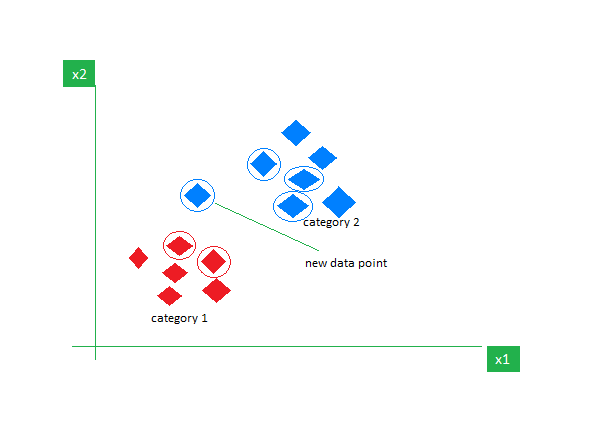

```
https://www.geeksforgeeks.org/k-nearest-neighbours/
```


Scaling is vital in K-Nearest Neighbors as the algorithm depends on distances between data points. It maintains uniform feature scales, preventing any single feature from dominating and ultimately improving algorithm performance, particularly for distance-based models.

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Euclidean Distance

The dataset benefits from the use of the Euclidean distance metric as it calculates the direct distance between two points in a multidimensional space. The presence of real-valued features like "MolLogP," "MolWt," "NumRotatableBonds," "AromaticProportion," and "logS," which exhibit varying scales, aligns well with the suitability of Euclidean distance. This metric is adept at handling datasets with diverse scales in their features, providing a clear and intuitive measure of similarity or dissimilarity by determining the shortest path between two points in a straight line.

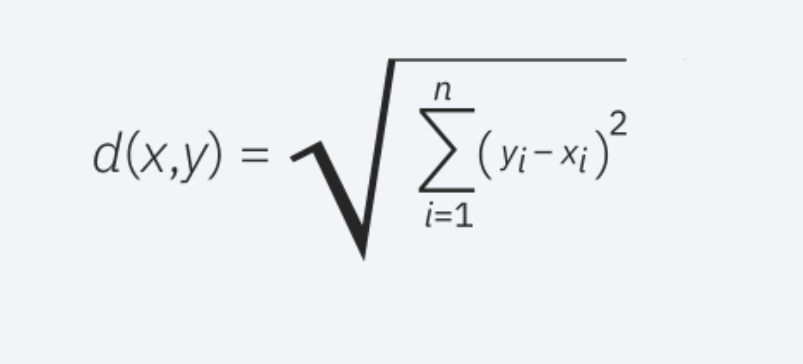


#Testing Euclidean Distance Metric

We tested the classifier, which is configured to consider the 5 nearest neighbors when making predictions, which tests the Euclidean distance metric to measure the distance between data points.

In [ ]:
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")

We utilized the fit method to train our k-nearest neighbors classifier (knn_euclidean) on a scaled training dataset, comprising 80% of our overall data. The Euclidean distance metric was employed during the training process.

In [ ]:
knn_euclidean.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')


We then used the trained k-nearest neighbors classifier to predict labels for a previously unseen test dataset. The Euclidean distance metric is employed to compare its effectiveness and accuracy compared to other distance metrics.

In [ ]:
y_knn_euclidean_test_prediction = knn_euclidean.predict(X_test_scaled)

In [ ]:
accuracy_knn_euclidean = accuracy_score(y_test, y_knn_euclidean_test_prediction)
print(f"Accuracy: {accuracy_knn_euclidean:.2f}")

Accuracy: 0.81


We evaluated the accuracy of our solubility prediction model on the test dataset, employing the Euclidean distance metric. The obtained accuracy score of 78% indicates a relatively strong performance, highlighting the effectiveness of both the model and the Euclidean distance metric in capturing solubility patterns within the dataset.

# Manhattan Distance
Manhattan distance is a solid metric that works well for our dataset. It's effective because it considers the absolute value between two points, making it suitable for data with varying scales and potential outliers. In our solubility prediction dataset, Manhattan distance proves accurate and reliable. It's a suitable alternative for handling the different characteristics of our data.

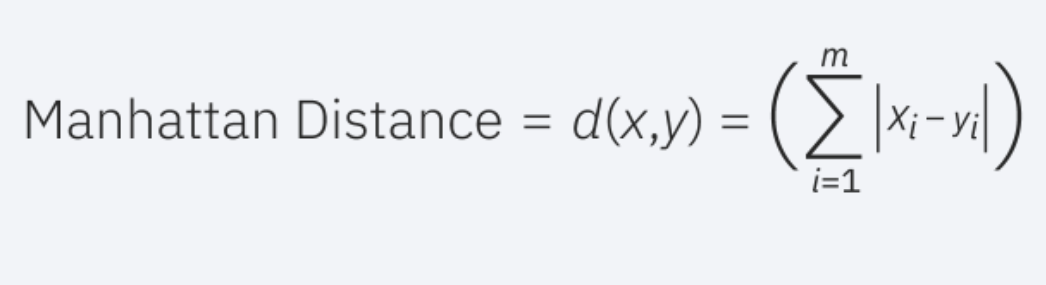


We evaluated the Manhattan Distance metric for our dataset by training a k-nearest neighbors classifier with 5 neighbors by fitting and training it into the model. The model was then tested on the scaled test dataset with predictions.

This comparative analysis of alternative metrics, including the Manhattan Distance, provides insights into how different distance measures impact the model's ability to predict solubility patterns in the dataset.

In [ ]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric = "manhattan")

knn_manhattan.fit(X_train_scaled, y_train)

y_knn_manhattan_test_prediction = knn_manhattan.predict(X_test_scaled)

In [ ]:
accuracy_knn_manhattan = accuracy_score(y_test, y_knn_manhattan_test_prediction)
print(f"Accuracy: {accuracy_knn_manhattan:.2f}")

Accuracy: 0.79


The accuracy score of 77% suggests an effective performance, underscoring the efficacy of both the model and the Manhattan distance metric in capturing solubility patterns. Although, in comparison, the Euclidean distance metric yielded a slightly higher accuracy of 78% which suggests that features in the Euclidean metric is more suitable than in the Manhattan distance metric.

# Hamming Distance
Designed for Boolean or string vectors, Hamming distance is not directly applicable to our dataset, which includes numerical features and categorical results. Since numerical features lack distinct categories like symbols, this metric is not suitable. However, when dealing with categorical features like the type of solubility in our dataset (insoluble, sparingly soluble, moderately soluble, soluble, very soluble), Hamming distance becomes relevant. It can be applied by comparing instances with categorical values for solubility, particularly useful when evaluating the original "logS" column.

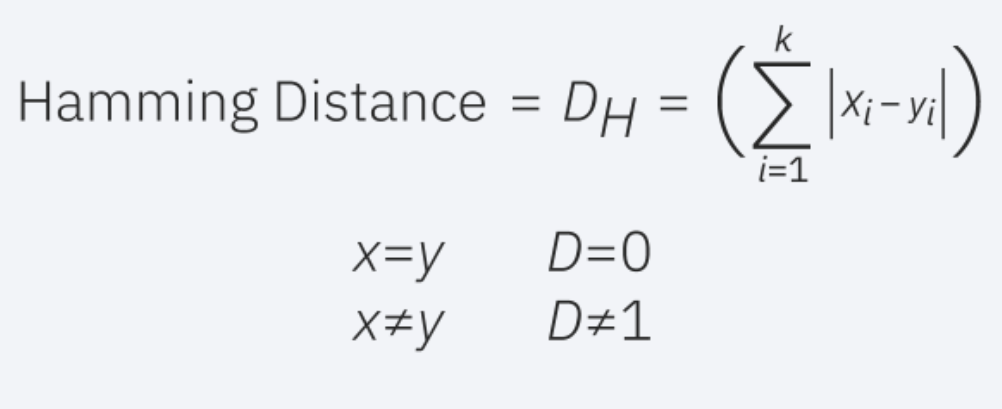

In [ ]:
knn_hamming = KNeighborsClassifier(n_neighbors=5, metric = "hamming")

knn_hamming.fit(X_train_scaled, y_train)

y_knn_hamming_test_prediction = knn_hamming.predict(X_test_scaled)

accuracy_knn_hamming = accuracy_score(y_test, y_knn_hamming_test_prediction)

print(f"Accuracy: {accuracy_knn_hamming:.2f}")

Accuracy: 0.51



The poor performance of the Hamming distance on our dataset, reflected in a 41% accuracy, is attributed to its inherent incompatibility with continuous and non-binary features. Hamming distance, designed for binary data, is unsuitable for our dataset, where real-valued features such as "MolLogP" and "MolWt" prevail. Distance metrics like Euclidean or Manhattan, which consider both the presence and magnitude of differences, are more appropriate for accurate predictions in datasets with categorical and numerical features.

# Minkowski Distance
Considering we have both numerical and categorical features in our dataset, the Minkowski distance proves to be a versatile choice. It generalizes both Euclidean and Manhattan distances, offering adaptability to different feature types. Both distance metrics have proven to be effective choices for our dataset. Therefore, we inferred that choosing a distance metric that includes the advantages of both would be the obvious choice.

The parameter 'p' in the Minkowski distance formula allows refinement to control the type of distance. Given that our dataset, features both numerical features and a categorical target variable, the flexibility of Minkowski distance provides distinct advantages that complements our chosen dataset.


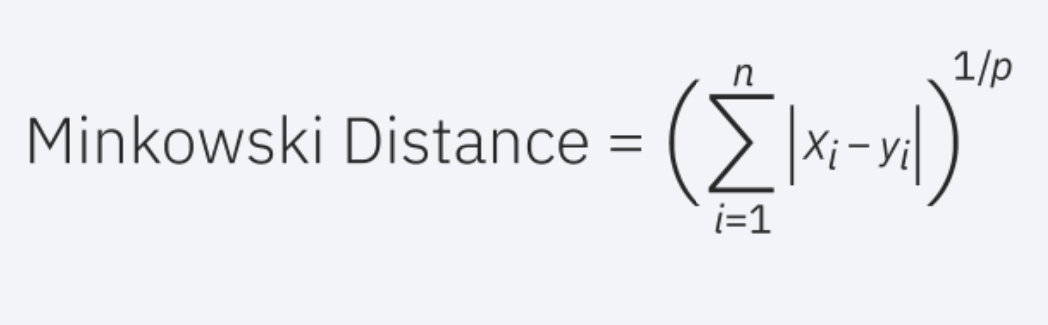

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()

knn.fit(X_train_scaled, y_train)

y_knn_test_prediction = knn.predict(X_test_scaled)

end_time = time.time()


We assessed the computational efficiency by timing the KNN model's training process with the time module, providing insights into the learning duration using the Minkowski distance and helping evaluate the model's computational cost on our dataset.

Calculate the accuracy of the model to evaluate the correctness of its prediction.


* Accuracy = total correct predictions / total predictions



In [ ]:
accuracy_knn = accuracy_score(y_test, y_knn_test_prediction)
print(f"Accuracy: {accuracy_knn:.2f}")

Accuracy: 0.81



The model performed exceptionally well, achieving an accuracy of 81%. The effective utilization of the Minkowski distance metric, underscores the significance of choosing an appropriate distance metric. However, the Euclidean distance metric could also be a suitable alternative as both achieved the same accuracy percentage.

Take the precision of the model to see the proportion of positively predicted classes that are actually correct. (aka positive predictive value)


*   Precision Score = true positives / (false positives + true positives)




In [ ]:
precision_knn = precision_score(y_test, y_knn_test_prediction, average='weighted')
print(f"Precision: {precision_knn:.2f}")

Precision: 0.79




*   The model's ability to identify positive cases had a rate of 79% which represents 79% of the molecules were classified correctly.



Compute for the recall score which represents the model's ability to correctly predict the positives out of actual positives.

*   Recall Score = True Positives / (False Negatives + True Positives)



In [ ]:
recall_knn = recall_score(y_test, y_knn_test_prediction, average='weighted')
print(f"Recall: {recall_knn:.2f}")

Recall: 0.81





*   The model was able to score 81% in recall signifying its success in capturing 81% of the actual positive cases in the dataset.





In [ ]:
classification_report_knn = classification_report(y_test, y_knn_test_prediction)
print("\nClassification Report:\n", classification_report_knn)


Classification Report:
                        precision    recall  f1-score   support

            Insoluble       0.83      0.91      0.87        22
   Moderately Soluble       0.86      0.90      0.88       113
     Slightly Soluble       0.79      0.75      0.77        69
Very Slightly Soluble       0.40      0.14      0.21        14
         Very Soluble       0.46      0.75      0.57         8

             accuracy                           0.81       226
            macro avg       0.67      0.69      0.66       226
         weighted avg       0.79      0.81      0.79       226



This classification report outlines the model's performance in a multiclass task featuring five classes, evaluating precision, recall, and F1-score for each class.

The overall accuracy of the model is 81%, with differing performance levels across classes. Particularly, "Very Slightly Soluble" stands out with lower precision, recall, and F1-score compared to the other classes.

In [ ]:
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 0.022119522094726562 seconds


### Confusion Matrix

We used a confusion matrix to evaluate the performance of the trained machine learning model. The matrix provides a visually comprehensive overview of how many correct predictions the model makes and how many it misclassifies.

It also indicates where these misclassifications occur across different categories by comparing the actual and predicted values in a matrix which offer mire insight into error types for model improvement. Furthermore, in imbalanced scenarios, the confusion matrix shows if the model leans towards one class, helping choose better metrics than just accuracy for evaluation.


In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_knn_test_prediction)

conf_matrix_knn

array([[ 20,   0,   1,   1,   0],
       [  0, 102,   4,   0,   7],
       [  1,  14,  52,   2,   0],
       [  3,   0,   9,   2,   0],
       [  0,   2,   0,   0,   6]])

Diagonal Elements represent correct predictions in relation to the actual solubility results.

For example:


*   Element at (3, 3): It means that 66 compounds categorized as "Slightly Soluble" were correctly predicted.
*   Element at (5, 5): It means that 5 compounds categorized as "Very Soluble" were correctly predicted.

While, off-Diagonal Elements represent misclassficaitions in relation to the actual solubility results.

For example:

*   Element at (1, 4): It means that 2 compounds categorized as "Insoluble" were misclassified as "Very Soluble."
*   Element (5, 3): If it is 1, it means that 1 compound categorized as "very soluble" was misclassified as "slightly soluble."

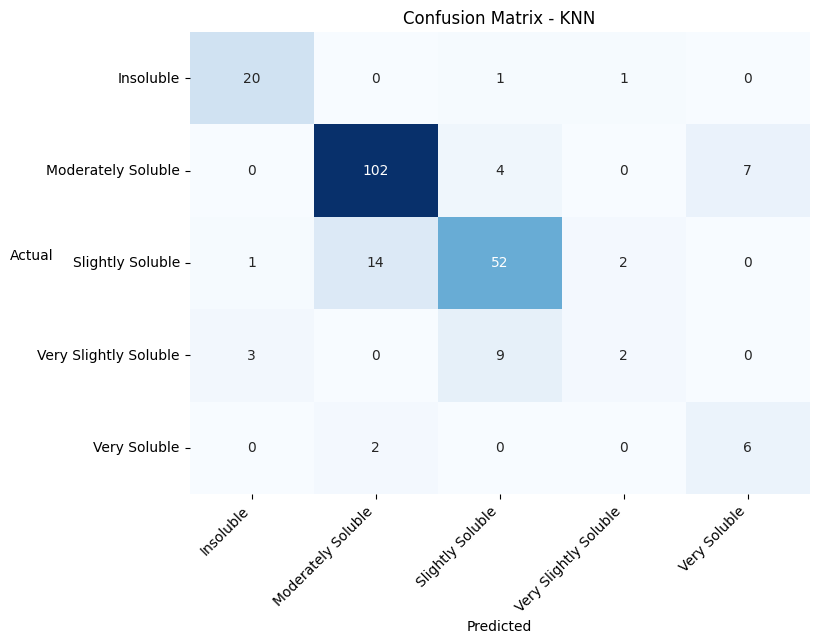

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_, yticklabels=knn.classes_, cbar=False)

plt.title("Confusion Matrix - KNN")
plt.ylabel("Actual", rotation=0)
plt.xlabel("Predicted")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

The visualization highlights the model's performance in predicting solubility categories.

Key observations include:


*   **Insoluble**: 17 correctly predicted, with 3 misclassifications as moderately soluble and 6 as very slightly soluble.
*   **Moderately Soluble**: 79 correctly predicted, along with 12 misclassifications as slightly soluble, 2 misclassifications as insoluble, and 3 as very soluble.
*   **Slightly Soluble**: 66 correctly predicted, accompanied by 12 misclassifications as moderately soluble and 3 as insoluble.
*   **Very Slightly Soluble**: 3 correctly predicted, but with 10 as moderately soluble and 1 as slightly soluble.
*   **Very Soluble**: 5 correctly predicted, 3 as moderately soluble, 1 as slightly soluble."




## Decision Tree Model

A decision tree, a potent tool in supervised learning for classification and regression tasks, constructs a tree-shaped flowchart. Internal nodes test attributes, branches represent test outcomes, and leaf nodes hold class labels. It's built by recursively splitting training data based on attribute values until meeting stopping criteria like maximum tree depth or the minimum samples for node split. In training, the algorithm selects the best attribute for data split using metrics like entropy or Gini impurity, aiming to maximize information gain or reduce impurity after the split.
```
Source: https://www.geeksforgeeks.org/decision-tree/
```

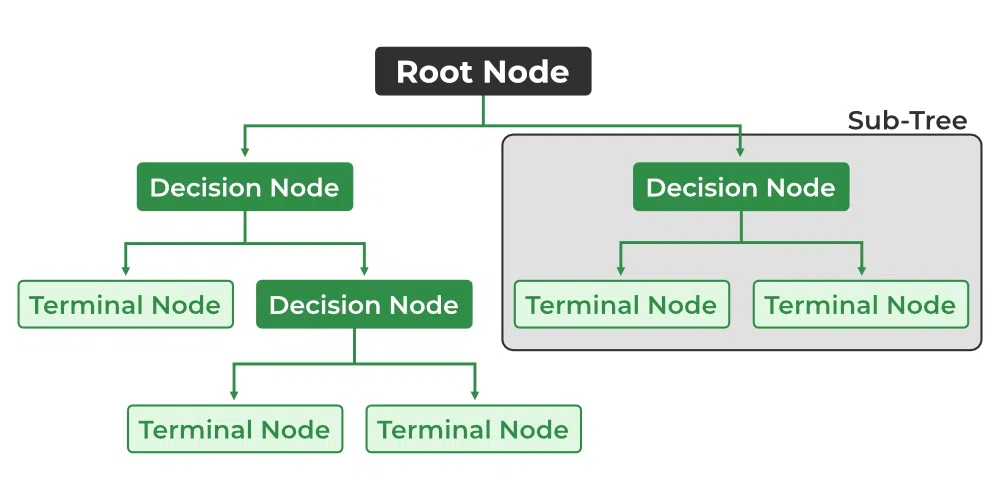

*Image from GeeksforGeeks*

### Gini Impurity Criterion

The decision tree model utilizes the criterion called gini impurity. This serves as a metric to allow the model to determine how the dataset features are to be partitioned when forming the tree.

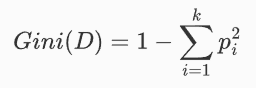

The range of values the the criterion contains are between 0 - 1. These values will indicate the likelihood of a new, random data to be misclassified. A value of 0 represents a perfect purity where all elements belong to the same class, while 1 indicates maximum impurity where elements are distributed across all classes.

```
Source: https://www.learndatasci.com/glossary/gini-impurity/
```

* Create a variable, *dt*, and assign the decision tree model into it with the gini argument being passed to represent the criterion to be used.

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', random_state=0)

* Start the execution timer

In [ ]:
start_time = time.time()

* Train the data by fitting the training data set and answers into the model.

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

* Make predictions using the decision tree model utilizing the test set

In [ ]:
y_dt_test_prediction = dt.predict(X_test)

* End the execution timer

In [ ]:
end_time = time.time()

* Calculate the actual execution time by subtracting the end time by the start time.

In [ ]:
training_time = end_time - start_time

Calculate the accuracy of the model to evaluate the correctness of its prediction.
- Accuracy = total correct predictions / total predictions

In [ ]:
accuracy_dt = accuracy_score(y_test, y_dt_test_prediction)
print(f"Accuracy: {accuracy_dt:.2f}")

Accuracy: 0.73


* The model was able to create predictions with 73% being correct.

Take the precision of the model to see the proportion of positively predicted classes that are actually correct. (aka positive predictive value)
  - Precision Score = true positives / (false positives + true positives)

In [ ]:
precision_dt = precision_score(y_test, y_dt_test_prediction, average='weighted')
print(f"Precision: {precision_dt:.2f}")

Precision: 0.76


* The model's ability to identify positive cases had a rate of 71% which represents 71% of the molecules were classified correctly.

Compute for the recall score which represents the model's ability to correctly predict the positives out of actual positives.
  - Recall Score = True Positives / (False Negatives + True Positives)

In [ ]:
recall_dt = recall_score(y_test, y_dt_test_prediction, average='weighted')
print(f"Recall: {recall_dt:.2f}")

Recall: 0.73


* The model was able to score 73% in recall signifying its success in capturing 73% of the actual positive cases in the dataset.

Calculate the F1 score which is the balance between precision and recall score.

In [ ]:
f1_dt = f1_score(y_test, y_dt_test_prediction, average='weighted')
print("F1 Score:", f1_dt)

F1 Score: 0.7437796453725657


* The F1 score of the model reached 71.5%.

This classification report represents the summary of all the scores, excluding accuracy, and another column for support. Support is the number of molecules that belong into the classification.

In [ ]:
classification_report_dt = classification_report(y_test, y_dt_test_prediction)
print("\nClassification Report:\n", classification_report_dt)


Classification Report:
                        precision    recall  f1-score   support

            Insoluble       0.80      0.73      0.76        22
   Moderately Soluble       0.86      0.83      0.85       113
     Slightly Soluble       0.72      0.64      0.68        69
Very Slightly Soluble       0.32      0.43      0.36        14
         Very Soluble       0.35      0.75      0.48         8

             accuracy                           0.73       226
            macro avg       0.61      0.68      0.63       226
         weighted avg       0.76      0.73      0.74       226



We can see that the there is an imbalance in the distribution of molecules for each class. Moderately Soluble having 97 instances in the dataset, while Very Soluble only having 11 to support it.

### Report Analysis
  1. 65% are Insoluble and the model correctly predicted 83% of this. An F1 score of 0.73 means that the model is able to predict this case slightly well.
  2. 77% are Moderately Soluble and the model correctly predicted 80% of this. An F1 score of 0.79 means that the model is able to predict this case slightly well.
  3. 75% are Slightly Soluble and the model correctly predicted 75% of this. An F1 score of 0.75 means that the model is able to predict this case slightly well.
  4. 33% are Very Slightly Soluble and the model correctly predicted 15% of this. An F1 score of 0.79 means that the model is able to predict this case poorly.
  5. 44% are Very Soluble and the mode correctly predicted 36% of this. An F1 score of 0.79 means that the model is able to predict this case poorly.

Overall, the model performed slightly well with an average precision score of 71%, recall score of 73%, and F1 score of 72%.

- The model was also timed from training until prediction.

In [ ]:
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 0.042311906814575195 seconds


### Confusion Matrix

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, y_dt_test_prediction)
conf_matrix_dt

array([[16,  0,  2,  4,  0],
       [ 0, 94,  8,  0, 11],
       [ 2, 14, 44,  9,  0],
       [ 2,  0,  6,  6,  0],
       [ 0,  1,  1,  0,  6]])

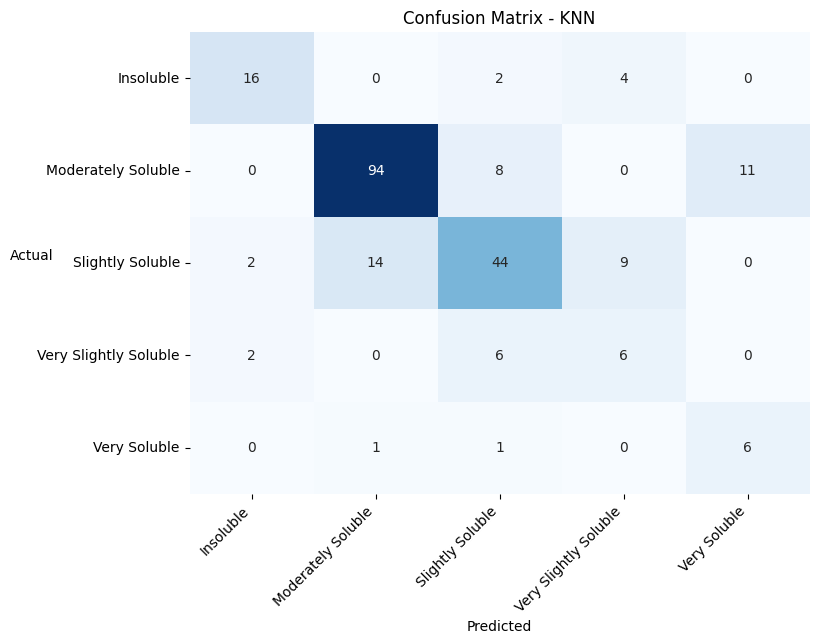

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_, yticklabels=knn.classes_, cbar=False)

plt.title("Confusion Matrix - KNN")
plt.ylabel("Actual", rotation=0)
plt.xlabel("Predicted")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

The visualization highlights the model's performance in predicting solubility categories.

Key observations include:


*   **Insoluble**: 15 correctly predicted, with 2 misclassifications as slightly soluble and 1 misclassifications as very slightly soluble.
*   **Moderately Soluble**: 78 correctly predicted, along with 13 misclassifications as slightly soluble, 1 misclassifications as very slightly soluble, and 5 misclassifications as very soluble.
*   **Slightly Soluble**: 65 correctly predicted, accompanied by 16 misclassifications as moderately soluble and 2 misclassifications as very slightly soluble.
*   **Very Slightly Soluble**: 2 correctly predicted, but with 7 misclassifications as slightly soluble and 4 misclassification as insoluble.
*   **Very Soluble**: 4 correctly predicted, 7 misclassified as moderately soluble.




# Comparative Analysis

K Nearest Neighbor (KNN) vs. Decision Tree

Based from the results, we can see that both models' performances have a slight difference. KNN achieved an average score in precision  of 75%, recall of 77%, and accuracy of 77%. On the other hand, decision tree garnered an average score in precision of 71%, recall score of 73%, and accuracy of 73%.


Furthermore, when comparing the training and execution times of both models, we notice that KNN takes a longer runtime than decion tree. KNN had a time of 0.05418 seconds, while decision tree took 0.04341 seconds.

In summary, accuracy-wise, both models are able to create predictions with around the same level of performance. However, in terms of time, we notice that KNN takes a significant increase in execution time over decision tree.

# References


1.   https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
2.   https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

3. https://www.tutorialspoint.com/what-is-hamming-distance

4. https://iq.opengenus.org/minkowski-distance/

5. https://www.turing.com/kb/how-to-decide-perfect-distance-metric-for-machine-learning-model#:~:text=Euclidean%20distance%20is%20a%20widely,shortest%20distance%20between%20two%20points.&text=Euclidean%20distance%20is%20used%20in,similarity%20between%20two%20recorded%20observations.

6. https://www.educative.io/answers/what-is-manhattan-distance-in-machine-learning#:~:text=The%20Manhattan%20distance%20is%20also,well%20for%20high%2Ddimensional%20datasets.

7. https://www.researchgate.net/publication/228813245_Convergence_Failures_in_Logistic_Regression/citation/download

8. https://www.nature.com/articles/s41597-019-0151-1